In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

# 물가상승률 상승 시각화

## 항목별 물가상승률

In [ ]:
# 소비자 물가 지수
import pandas as pd

inflation = pd.read_excel('/content/drive/MyDrive/비쥬얼라이제이션_프로젝트/data/소비자물가총지수_행렬변환.xlsx')
inflation.columns = ['항목','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022']
inflation.drop([0,1,16,17,18], axis=0,inplace=True)
inflation['2012']=inflation['2012'].astype('float')
inflation.reset_index(drop=True,inplace = True)

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
inflation

,항목,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,소비자물가 총지수(2020=100),91.8,93.0,94.2,94.9,95.8,97.6,99.1,99.5,100.0,102.5,107.7
1,소비자물가상승률(%),2.2,1.3,1.3,0.7,1.0,1.9,1.5,0.4,0.5,2.5,5.1
2,식료품 · 비주류음료,4.0,0.9,0.3,1.6,2.3,3.4,2.8,0.0,4.4,5.9,5.9
3,주류 및 담배,1.5,1.7,-0.1,50.1,0.7,1.5,0.3,0.6,0.3,0.4,2.2
4,의류 및 신발,4.8,2.9,4.0,1.3,1.8,1.1,1.1,0.1,0.7,0.6,3.1
5,주택 ·수도 · 전기 및 연료,4.6,3.5,2.9,-0.6,-0.8,1.7,0.7,1.2,0.5,1.6,5.5
6,가정용품 및 가사 서비스,2.9,0.3,2.1,2.6,1.6,1.1,2.3,2.1,0.0,1.9,4.8
7,보건,0.9,0.4,0.7,1.3,1.0,0.9,-0.1,0.5,1.5,-0.1,0.8
8,교통,3.2,-0.5,-1.6,-7.8,-2.2,3.6,2.4,-1.8,-1.8,6.3,9.7
9,통신,-2.6,-0.1,-0.1,-0.2,0.1,0.3,-0.9,-2.3,-2.1,-0.9,0.9


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


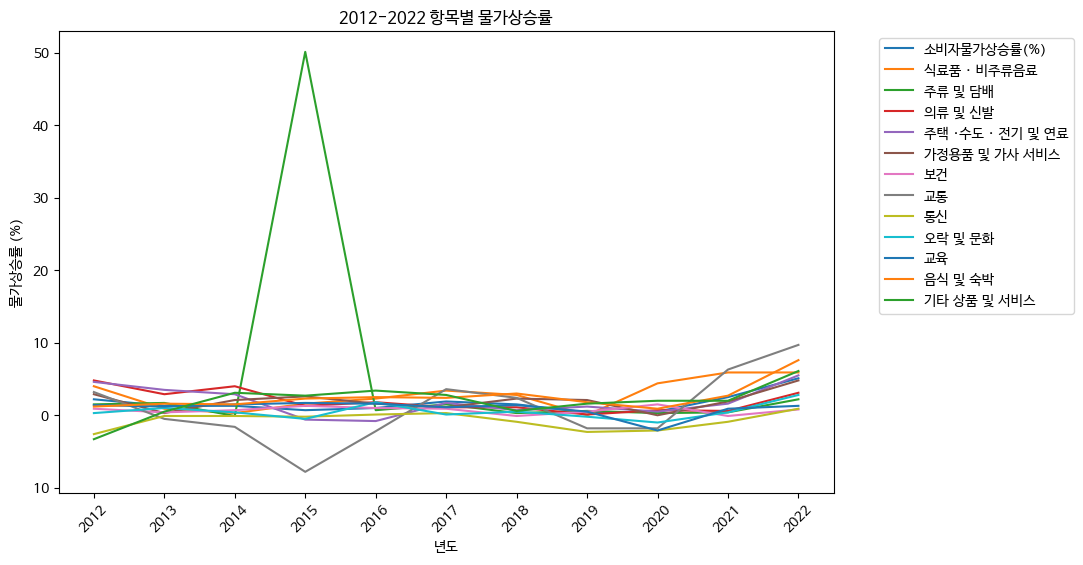

In [ ]:
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'NanumBarunGothic'
inf_not_all = inflation.drop(0,axis =0)
for i in range(len(inf_not_all)):
    plt.plot(inf_not_all.columns[1:], inf_not_all.iloc[i, 1:], label=inf_not_all.iloc[i, 0])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('2012-2022 항목별 물가상승률')
plt.xlabel('년도')
plt.ylabel('물가상승률 (%)')
plt.xticks(rotation=45)
plt.show()

교통 비용의 물가 상승률은 다른 카테고리에 비해 매우 불안정한 경향이 있습니다. 특히 2015년에는 물가상승률이 크게 하락했으나, 이후 다시 상승하며 2022년에는 가장 높은 상승률을 보여주었습니다.

주류 및 담배 항목은 2015년에 뚜렷하게 상승하는 현상을 보여주고 있습니다. 이는 담배가격 인상 등의 정책적 요인으로 인한 결과로 추정됩니다.

대부분의 카테고리에서 2022년의 물가 상승률이 눈에 띄게 증가했습니다. 이는 경제 환경 변화, 공급망 이슈, 원자재 가격 상승 등 다양한 요인이 뒤섞여 일어날 수 있는 현상입니다.

통신 카테고리의 물가 상승률은 대체로 음수이거나 상승률이 매우 낮은 것으로 보여집니다. 이는 통신 서비스의 경쟁력 강화 및 기술 발전에 따른 비용 절감 효과로 해석할 수 있습니다.

이렇게 각 항목의 특징을 종합해 보면, 각 카테고리의 물가 상승률은 그 분야의 정책적, 기술적 변화뿐만 아니라 전반적인 경제 상황 등에 의해 크게 영향을 받는다는 것을 알 수 있습니다.

In [ ]:
# 데이터프레임에서 각 row의 표준편차를 계산 (변동성 파악)
inflation_new = inflation.copy()
inflation_new['std_dev'] = inflation.loc[:,'2012':'2022'].std(axis=1)
inflation_new

,항목,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,std_dev
0,소비자물가 총지수(2020=100),91.8,93.0,94.2,94.9,95.8,97.6,99.1,99.5,100.0,102.5,107.7,4.625601
1,소비자물가상승률(%),2.2,1.3,1.3,0.7,1.0,1.9,1.5,0.4,0.5,2.5,5.1,1.321432
2,식료품 · 비주류음료,4.0,0.9,0.3,1.6,2.3,3.4,2.8,0.0,4.4,5.9,5.9,2.071846
3,주류 및 담배,1.5,1.7,-0.1,50.1,0.7,1.5,0.3,0.6,0.3,0.4,2.2,14.848691
4,의류 및 신발,4.8,2.9,4.0,1.3,1.8,1.1,1.1,0.1,0.7,0.6,3.1,1.524706
5,주택 ·수도 · 전기 및 연료,4.6,3.5,2.9,-0.6,-0.8,1.7,0.7,1.2,0.5,1.6,5.5,2.033939
6,가정용품 및 가사 서비스,2.9,0.3,2.1,2.6,1.6,1.1,2.3,2.1,0.0,1.9,4.8,1.303143
7,보건,0.9,0.4,0.7,1.3,1.0,0.9,-0.1,0.5,1.5,-0.1,0.8,0.508831
8,교통,3.2,-0.5,-1.6,-7.8,-2.2,3.6,2.4,-1.8,-1.8,6.3,9.7,4.790673
9,통신,-2.6,-0.1,-0.1,-0.2,0.1,0.3,-0.9,-2.3,-2.1,-0.9,0.9,1.156562


먼저, 표준편차가 가장 높은 항목은 '주류 및 담배'로, 이는 이 항목의 물가 상승률이 2012년부터 2022년까지 꽤 많이 변동하였음을 나타냅니다. 특히 2015년에는 물가 상승률이 50.1로 매우 큰 변동을 보였습니다.

반면에 '보건' 항목의 표준편차는 가장 낮으며, 이는 이 항목의 물가 상승률이 이 기간 동안 상대적으로 안정적이었음을 의미합니다.

또한 '소비자물가 총지수'는 점차적으로 상승하였고, 이는 대체로 물가가 안정적으로 상승하였음을 나타냅니다. 2022년에는 물가상승률이 가장 높았으며, 이는 최근 물가 상승 압력이 증가하였음을 나타낼 수 있습니다.

'교통' 항목은 음수의 물가 상승률을 가진 년도가 있었는데, 이는 교통비용이 일시적으로 감소하였음을 나타냅니다.

이런 방식으로, 각 항목의 물가 상승률과 그 변동성을 이해하면서 경제 상황을 평가하는데 도움이 될 수 있습니다. 이 데이터는 소비자의 소비 패턴, 정부의 정책 결정, 기업의 가격 설정 등에 영향을 미칠 수 있습니다.

## 2023년 물가 지수 예측 (선형회귀분석)

In [ ]:
from sklearn.linear_model import LinearRegression

# 각 항목에 대해 선형 회귀를 수행하고 다음년도 물가를 예측
inflation_new['2023_prediction'] = 0
for i in range(len(inflation_new)):
    X = inflation_new.columns[1:-2].astype(int).values.reshape(-1, 1) # 연도
    y = inflation_new.iloc[i, 1:-2].values.reshape(-1, 1) # 물가 상승률
    model = LinearRegression().fit(X, y)
    # inflation_new.loc[i, '2023_prediction'] = model.predict(np.array([[2023]]))
    inflation_new.loc[i, '2023_prediction'] = model.predict(np.array([[2023]])).item()



In [ ]:
inflation_new

,항목,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,std_dev,2023_prediction
0,소비자물가 총지수(2020=100),91.8,93.0,94.2,94.9,95.8,97.6,99.1,99.5,100.0,102.5,107.7,4.625601,105.867273
1,소비자물가상승률(%),2.2,1.3,1.3,0.7,1.0,1.9,1.5,0.4,0.5,2.5,5.1,1.321432,2.589091
2,식료품 · 비주류음료,4.0,0.9,0.3,1.6,2.3,3.4,2.8,0.0,4.4,5.9,5.9,2.071846,4.996364
3,주류 및 담배,1.5,1.7,-0.1,50.1,0.7,1.5,0.3,0.6,0.3,0.4,2.2,14.848691,-0.067273
4,의류 및 신발,4.8,2.9,4.0,1.3,1.8,1.1,1.1,0.1,0.7,0.6,3.1,1.524706,0.280000
5,주택 ·수도 · 전기 및 연료,4.6,3.5,2.9,-0.6,-0.8,1.7,0.7,1.2,0.5,1.6,5.5,2.033939,1.607273
6,가정용품 및 가사 서비스,2.9,0.3,2.1,2.6,1.6,1.1,2.3,2.1,0.0,1.9,4.8,1.303143,2.480000
7,보건,0.9,0.4,0.7,1.3,1.0,0.9,-0.1,0.5,1.5,-0.1,0.8,0.508831,0.556364
8,교통,3.2,-0.5,-1.6,-7.8,-2.2,3.6,2.4,-1.8,-1.8,6.3,9.7,4.790673,4.992727
9,통신,-2.6,-0.1,-0.1,-0.2,0.1,0.3,-0.9,-2.3,-2.1,-0.9,0.9,1.156562,-0.549091


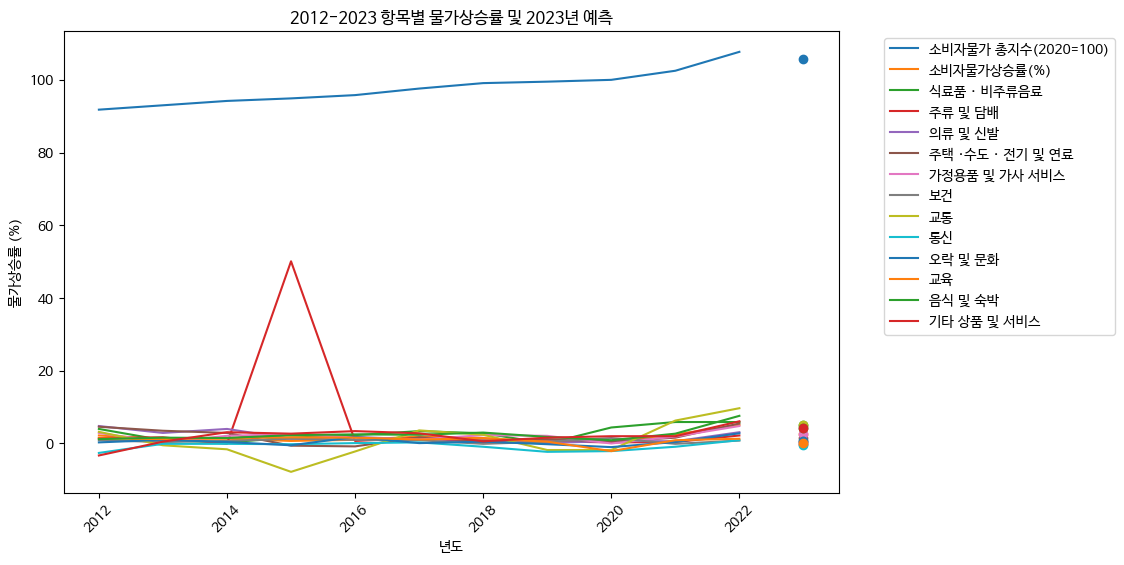

In [ ]:
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'NanumBarunGothic'

lines = []  # 선 객체를 저장할 리스트
for i in range(len(inflation_new)):
    line, = plt.plot(years[:-1], inflation_new.iloc[i, 1:-2])
    lines.append(line)  # 선 객체 저장

# 2023년 예측 값을 추가
for i, line in enumerate(lines):
    plt.scatter(2023, inflation_new['2023_prediction'][i], color=line.get_color())  # 선의 색상으로 점 표시

plt.legend(inflation_new['항목'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('2012-2023 항목별 물가상승률 및 2023년 예측')
plt.xlabel('년도')
plt.ylabel('물가상승률 (%)')
plt.xticks(rotation=45)
plt.show()


## 소비자 물가 총지수 상승

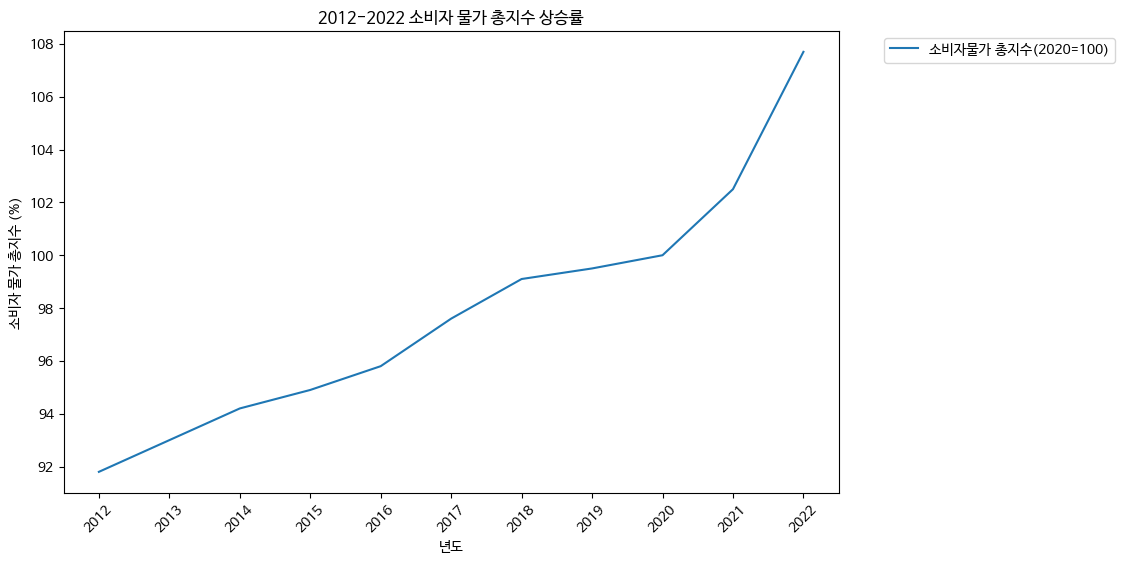

In [ ]:
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'NanumBarunGothic'
inf_all = inflation[inflation.index == 0]
for i in range(len(inf_all)):
    plt.plot(inf_all.columns[1:], inf_all.iloc[i, 1:], label=inf_all.iloc[i, 0])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('2012-2022 소비자 물가 총지수 상승률')
plt.xlabel('년도')
plt.ylabel('소비자 물가 총지수 (%)')
plt.xticks(rotation=45)
plt.show()

# 물가상승률에 따른 최저임금의 인상률

In [ ]:
# 연도별 최저 임금
import pandas as pd

min_wage = pd.read_csv('/content/drive/MyDrive/비쥬얼라이제이션_프로젝트/data/고용노동부_연도별 최저임금_20220805.csv',encoding='cp949')
min_wage.drop(min_wage.columns[0] ,axis=1, inplace = True)
min_wage

,연도,시간급
0,2023,9620
1,2022,9160
2,2021,8720
3,2020,8590
4,2019,8350
5,2018,7530
6,2017,6470
7,2016,6030
8,2015,5580
9,2014,5210


In [ ]:
min_wage['시간급'][::-1].pct_change()

9         NaN
8    0.071017
7    0.080645
6    0.072968
5    0.163833
4    0.108898
3    0.028743
2    0.015134
1    0.050459
0    0.050218
Name: 시간급, dtype: float64

In [ ]:
inf = inflation.drop(inflation.columns[0:3],axis =1 ).iloc[0].to_list()
inf_2023 = round((110.10+110.38+110.56+110.80+111.13+111.12)/6,1) # 2023년 1월부터 6월까지의 평균 물가상승률을 2023년의 물가상승률이라고 임의로 정의
inf.append(inf_2023)
inf.reverse()
inf

[110.7, 107.7, 102.5, 100.0, 99.5, 99.1, 97.6, 95.8, 94.9, 94.2]

In [ ]:
# 물가상승률에 따른 최저임금의 인상률
min_wage['시간급(실질)'] = min_wage['시간급']/ inf
min_wage

,연도,시간급,시간급(실질)
0,2023,9620,86.901536
1,2022,9160,85.051068
2,2021,8720,85.073171
3,2020,8590,85.900000
4,2019,8350,83.919598
5,2018,7530,75.983855
6,2017,6470,66.290984
7,2016,6030,62.943633
8,2015,5580,58.798736
9,2014,5210,55.307856



최저임금을 소비자물가총지수로 나누는 것은 인플레이션, 즉 물가상승률을 반영하여 임금의 '실질적인' 가치를 파악하기 위함입니다.

예를 들어, 어떤 해에 최저임금이 10,000원이었고 다음 해에 최저임금이 10,500원으로 올랐다면, '명목상' 최저임금은 5% 증가한 것으로 보입니다. 하지만, 만약 이 기간 동안 물가가 3% 상승했다면, 실질적으로 최저임금은 2%밖에 증가하지 않은 것입니다. 즉, 물가상승률을 고려하지 않은 경우 실제 구매력이나 생활비에 대한 정확한 파악이 어려워집니다.

따라서 이를 보정하기 위해 소비자물가총지수를 사용하여 최저임금을 나누어 '실질' 최저임금을 계산하는 것입니다. 이렇게 하면 물가상승률을 반영하여 보다 정확하게 임금의 가치 변화를 파악할 수 있습니다.

물가 상승률이 임금 상승률보다 높다면, 사람들의 생활비는 상승하지만 임금이 그만큼 따라오지 못하는 상황을 나타냅니다. 반대로, 임금 상승률이 물가 상승률보다 높다면 임금의 실질적 가치가 상승하고 있음을 의미합니다.

# 물가상승률과 임금상승률을 비교해서 임금의 실질적 가치가 증가하는지 볼 수 있는 시각화

In [ ]:
# 월평균 임금
import pandas as pd
mean_wage = pd.read_excel('/content/drive/MyDrive/비쥬얼라이제이션_프로젝트/data/월평균임금_행렬변환.xlsx')
mean_wage.columns = ['연도', '전체', '남성','여성','전체(실질)']
mean_wage.drop([0,1,2,20,21,22,23,24,25], axis=0,inplace=True)
mean_wage.reset_index(drop=True,inplace=True)

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
# 해당 열들을 선택하여 ','을 ''로 replace하고, 이후 int로 변환합니다.
cols = ['연도', '전체','남성', '여성', '전체(실질)']
for col in cols:
    mean_wage[col] = mean_wage[col].str.replace(',', '').astype(int)

mean_wage

,연도,전체,남성,여성,전체(실질)
0,2006,2069,2451,1413,2719
1,2007,2178,2570,1524,2792
2,2008,2279,2700,1583,2791
3,2009,2277,2691,1588,2714
4,2010,2326,2754,1633,2693
5,2011,2428,2869,1714,2702
6,2012,2527,2974,1815,2752
7,2013,2617,3095,1873,2814
8,2014,2700,3218,1925,2866
9,2015,2740,3269,1944,2888


In [ ]:
# 전치(transpose)
inflation_T = inflation.T

# 첫 번째 행을 열 이름으로 설정
inflation_T.columns = inflation_T.iloc[0]
inflation_T = inflation_T[1:]

# Reset index (optional)
inflation_T.reset_index(inplace=True)

# index 열 이름을 '연도'로 변경
inflation_T.rename(columns={'index':'연도'}, inplace=True)

# '연도' 열의 데이터 타입을 정수형으로 변환
inflation_T['연도'] = inflation_T['연도'].astype(int)

inflation_T = inflation_T.rename_axis(None)
inflation_T

항목,연도,소비자물가 총지수(2020=100),소비자물가상승률(%),식료품 · 비주류음료,주류 및 담배,의류 및 신발,주택 ·수도 · 전기 및 연료,가정용품 및 가사 서비스,보건,교통,통신,오락 및 문화,교육,음식 및 숙박,기타 상품 및 서비스
0,2012,91.8,2.2,4.0,1.5,4.8,4.6,2.9,0.9,3.2,-2.6,0.3,1.4,1.2,-3.3
1,2013,93.0,1.3,0.9,1.7,2.9,3.5,0.3,0.4,-0.5,-0.1,1.0,1.2,1.6,0.5
2,2014,94.2,1.3,0.3,-0.1,4.0,2.9,2.1,0.7,-1.6,-0.1,0.4,1.5,1.5,3.1
3,2015,94.9,0.7,1.6,50.1,1.3,-0.6,2.6,1.3,-7.8,-0.2,-0.5,1.7,2.3,2.7
4,2016,95.8,1.0,2.3,0.7,1.8,-0.8,1.6,1.0,-2.2,0.1,1.8,1.6,2.5,3.4
5,2017,97.6,1.9,3.4,1.5,1.1,1.7,1.1,0.9,3.6,0.3,0.1,1.1,2.4,2.8
6,2018,99.1,1.5,2.8,0.3,1.1,0.7,2.3,-0.1,2.4,-0.9,0.5,1.4,3.0,0.6
7,2019,99.5,0.4,0.0,0.6,0.1,1.2,2.1,0.5,-1.8,-2.3,-0.2,0.5,1.8,1.6
8,2020,100.0,0.5,4.4,0.3,0.7,0.5,0.0,1.5,-1.8,-2.1,-1.0,-2.1,0.9,2.0
9,2021,102.5,2.5,5.9,0.4,0.6,1.6,1.9,-0.1,6.3,-0.9,0.4,0.9,2.7,2.0


In [ ]:
inflation_T['소비자물가상승률(%)']

0     2.2
1     1.3
2     1.3
3     0.7
4     1.0
5     1.9
6     1.5
7     0.4
8     0.5
9     2.5
10    5.1
Name: 소비자물가상승률(%), dtype: object

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 데이터 정규화
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()
scaler3 = MinMaxScaler()

# 연도 인덱스에 따른 범위 선택
mean_wage_filtered = mean_wage[(mean_wage['연도'] >= 2014) & (mean_wage['연도'] < 2023)]
wage_data_filtered = min_wage[(min_wage['연도'] >= 2014) & (min_wage['연도'] < 2023)][::-1]
inflation_filtered = inflation_T[(inflation_T['연도'] >= 2014) & (inflation_T['연도'] < 2023)]


# # 스케일링
# mean_wage_normalized = mean_wage_filtered.copy()
# mean_wage_normalized[['전체', '남성', '여성', '전체(실질)']] = scaler1.fit_transform(mean_wage_normalized[['전체', '남성', '여성', '전체(실질)']])

# wage_data_normalized = wage_data_filtered.copy()
# wage_data_normalized[['시간급', '시간급(실질)']] = scaler2.fit_transform(wage_data_normalized[['시간급', '시간급(실질)']])

# inflation_rate = np.array(inflation_filtered[inflation_filtered['항목']=='소비자물가상승률(%)'].iloc[0, 3:][::-1]).reshape(-1,1)
# inflation_rate_normalized = scaler3.fit_transform(inflation_rate)

mean_wage_normalized = mean_wage_filtered.copy()
mean_wage_normalized[['전체', '남성', '여성', '전체(실질)']] = scaler1.fit_transform(mean_wage_normalized[['전체', '남성', '여성', '전체(실질)']])

wage_data_normalized = wage_data_filtered.copy()
wage_data_normalized[['시간급', '시간급(실질)']] = scaler2.fit_transform(wage_data_normalized[['시간급', '시간급(실질)']])

inflation_filtered['소비자물가상승률(%)'] = inflation_filtered['소비자물가상승률(%)'].astype('float')
inflation_rate_normalized = scaler3.fit_transform(inflation_filtered[['소비자물가상승률(%)']])


<ipython-input-325-174aa45eee3e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflation_filtered['소비자물가상승률(%)'] = inflation_filtered['소비자물가상승률(%)'].astype('float')


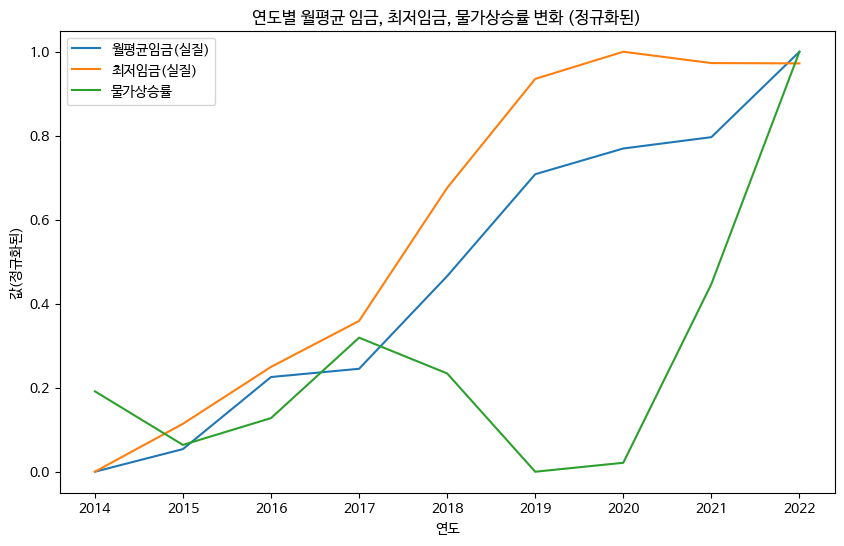

In [ ]:
# 시각화
plt.figure(figsize=(10,6))
plt.rcParams['font.family'] = 'NanumBarunGothic'
sns.lineplot(x=mean_wage_normalized['연도'], y=mean_wage_normalized['전체(실질)'], label='월평균임금(실질)')
sns.lineplot(x=wage_data_normalized['연도'], y=wage_data_normalized['시간급(실질)'], label='최저임금(실질)')
sns.lineplot(x=wage_data_normalized['연도'], y=inflation_rate_normalized.flatten(), label='물가상승률')
plt.title('연도별 월평균 임금, 최저임금, 물가상승률 변화 (정규화된)')
plt.xlabel('연도')
plt.ylabel('값(정규화된)')
plt.legend()
plt.show()

월평균 임금(실질): 이 지표는 시간에 따라서 선형적으로 상승하는 추세를 보입니다. 이는 일반적으로 생활 수준의 향상과 연관되어 있을 수 있습니다.

최저임금(실질): 최저임금 역시 전반적으로 상승하는 경향을 보입니다. 그러나, 상승률이 월평균 임금보다 높아 직접적인 비교가 어렵습니다.

물가상승률: 물가상승률은 초기에는 비교적 안정적이었으나, 후반에 가서 급등하는 추세를 보입니다. 이는 임금 상승률이 물가 상승률을 따라잡지 못하고 있음을 시사합니다.




#### 시각화를 통해 임금의 실질적 가치에 대한 통찰
임금 상승률과 물가 상승률을 함께 살펴보면, 임금의 실질적 가치는 물가 상승률을 초과하는 임금 상승률이 필요합니다. 즉, 물가 상승률이 임금 상승률을 초과하면, 사람들의 구매력은 감소하게 됩니다. 반대로, 임금 상승률이 물가 상승률을 초과하면 사람들의 구매력은 증가하게 됩니다.

이 그래프에서는 초기에 임금 상승률이 물가 상승률을 상당히 초과하는 것을 볼 수 있습니다. 이는 실질적인 임금 즉, 구매력이 증가하고 있다는 것을 의미합니다. 그러나 그래프의 후반부에서는 물가 상승률이 급격히 증가하며 임금 상승률을 능가하는 것을 볼 수 있습니다. 이는 임금의 실질적 가치, 즉 사람들의 실질 구매력이 감소하고 있음을 의미합니다.

따라서 이 그래프를 통해 임금의 실질적 가치는 초기에는 증가했으나, 최근에는 물가 상승률에 비해 임금 상승률이 더디게 진행되어 실질 구매력이 감소하고 있음을 알 수 있습니다. 이는 임금이 물가 상승에 비해 충분히 증가하지 않아서 생기는 문제로, 이에 대한 적절한 정책적 대응이 필요해 보입니다.

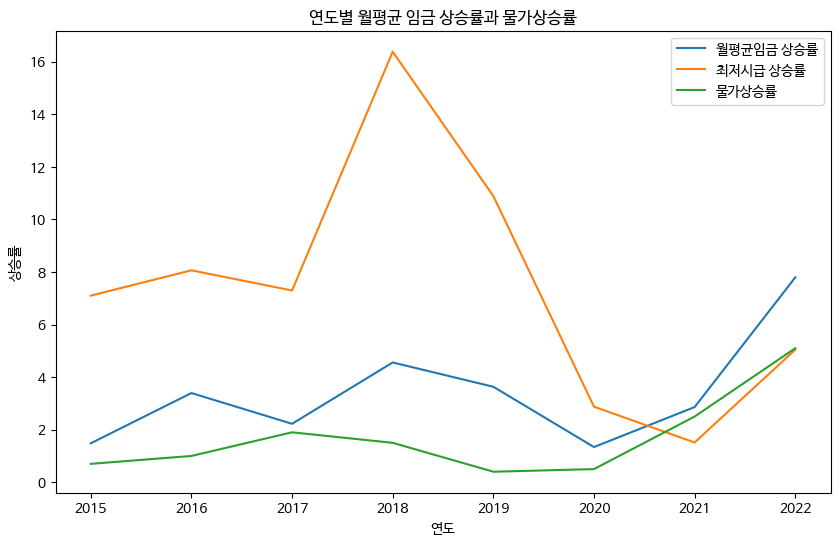

In [ ]:
# 월 평균 임금의 상승률 계산
mean_wage_new = mean_wage.copy()
mean_wage_new['전체 상승률'] = mean_wage['전체'].pct_change() * 100  # %로 비교

# 최저 시급의 상승률 계산
min_wage_new = min_wage.copy()
min_wage_new['전체 상승률'] = min_wage['시간급'][::-1].pct_change() * 100

# mean_wage_new.replace([np.inf, -np.inf], np.nan, inplace=True)

# 상승률 계산을 위해 첫번째 row는 NaN이 될 것이므로 제거
mean_wage_new = mean_wage_new.dropna()
min_wage_new = min_wage_new.dropna()

# 비교할 물가상승률 데이터도 동일한 기간으로 맞춰주기
inflation_rate = inflation_T['소비자물가상승률(%)'].astype(float)

# 시각화
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.figure(figsize=(10,6))
sns.lineplot(x=mean_wage_new['연도'][8:], y=mean_wage_new['전체 상승률'][8:], label='월평균임금 상승률')
sns.lineplot(x=min_wage_new['연도'][::-1][:8], y=min_wage_new['전체 상승률'][::-1][:8], label='최저시급 상승률')
sns.lineplot(x=inflation_T['연도'][3:], y=inflation_rate[3:], label='물가상승률')
plt.title('연도별 월평균 임금 상승률과 물가상승률')
plt.xlabel('연도')
plt.ylabel('상승률')
plt.legend()
plt.show()


In [ ]:
mean_wage_new['연도'][8:]

9     2015
10    2016
11    2017
12    2018
13    2019
14    2020
15    2021
16    2022
Name: 연도, dtype: int64

In [ ]:
min_wage_new['연도'][::-1][:8]

8    2015
7    2016
6    2017
5    2018
4    2019
3    2020
2    2021
1    2022
Name: 연도, dtype: int64

In [ ]:
inflation_T['연도'][3:]

3     2015
4     2016
5     2017
6     2018
7     2019
8     2020
9     2021
10    2022
Name: 연도, dtype: int64

In [ ]:
mean_wage_new['전체 상승률'][8:]

9     1.481481
10    3.394161
11    2.223791
12    4.558011
13    3.632761
14    1.338432
15    2.861635
16    7.795781
Name: 전체 상승률, dtype: float64

In [ ]:
min_wage_new['전체 상승률'][::-1][:8]

8     7.101727
7     8.064516
6     7.296849
5    16.383308
4    10.889774
3     2.874251
2     1.513388
1     5.045872
Name: 전체 상승률, dtype: float64

In [ ]:
inflation_rate[3:]

3     0.7
4     1.0
5     1.9
6     1.5
7     0.4
8     0.5
9     2.5
10    5.1
Name: 소비자물가상승률(%), dtype: float64

월평균임금 상승률: 2015년에 비해 2022년까지 월평균임금 상승률이 점진적으로 증가하였습니다. 특히 2022년에는 7.80%로 가장 높은 상승률을 보였습니다.

최저시급 상승률: 최저시급 상승률도 연도별로 증가하였으나, 상승률은 매우 불규칙적입니다. 가장 높은 상승률은 2018년에 16.38%로 기록하였고, 이후 상승률은 점차 하락하여 2022년에는 5.05%로 떨어졌습니다.

소비자물가상승률: 2015년부터 2022년까지 소비자물가상승률은 일반적으로 낮았으나, 2022년에 5.1%로 급증하였습니다.

이 데이터를 바탕으로 할 때, 월평균임금 상승률과 최저시급 상승률 모두 소비자물가상승률보다 높아야 사람들의 생활 수준이 개선될 것입니다. 반면에 이 두 가지 상승률이 소비자물가상승률보다 낮으면, 사람들의 구매력은 실제로 떨어지게 됩니다.

각 연도에 대한 세 가지 지표를 비교하면, 전반적으로 월평균임금 상승률과 최저시급 상승률이 소비자물가상승률보다 높습니다. 이는 실질임금이 증가하고 있다는 것을 의미합니다. 하지만, 2022년에는 물가상승률이 급증하여 이전과는 다른 상황이 나타나고 있는 것 같습니다. 이러한 상황은 이후 연구에서 더 자세히 다뤄질 필요가 있습니다.

## 누적 상승률 (데이터 정리 필요)

In [ ]:
# 월 평균 임금의 상승률 계산
mean_wage_new = mean_wage.copy()
mean_wage_new['전체 누적 상승률'] = (mean_wage_new['전체'].pct_change() + 1).cumprod() * 100

# 최저 시급의 상승률 계산
min_wage_new = min_wage.copy()[::-1].reset_index(drop=True)
min_wage_new['전체 누적 상승률'] = (min_wage_new['시간급'].pct_change() + 1).cumprod() * 100
min_wage_new['전체 상승률'] = min_wage['시간급'].pct_change() * 100

# 상승률 계산을 위해 첫번째 row는 NaN이 될 것이므로 제거
mean_wage_new = mean_wage_new.dropna()
min_wage_new = min_wage_new.dropna()

# 비교할 물가상승률 데이터도 동일한 기간으로 맞춰주기
inflation_rate = (inflation_T['소비자물가상승률(%)'].astype(float) / 100 + 1).cumprod() * 100



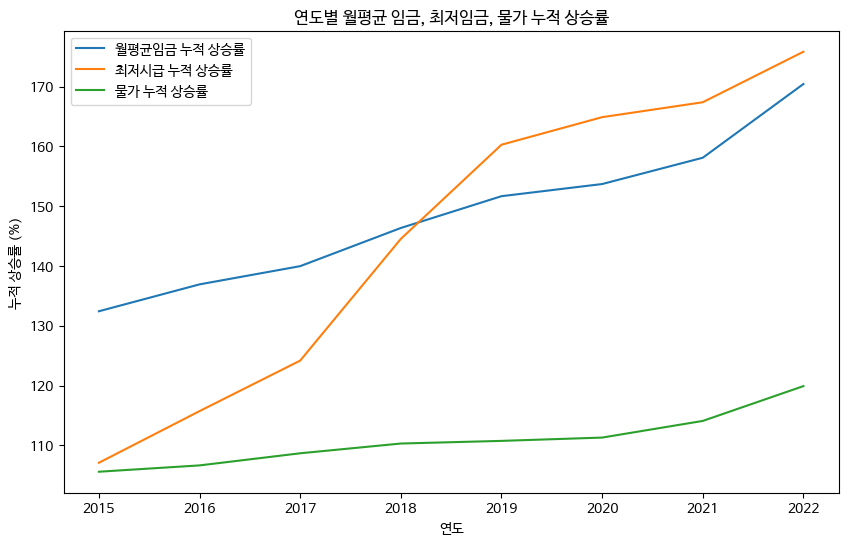

In [ ]:
# 시각화
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.figure(figsize=(10,6))
sns.lineplot(x=mean_wage_new['연도'][8:], y=mean_wage_new['전체 누적 상승률'][8:], label='월평균임금 누적 상승률')
sns.lineplot(x=min_wage_new['연도'][:8], y=min_wage_new['전체 누적 상승률'][:8], label='최저시급 누적 상승률')
sns.lineplot(x=inflation_T['연도'][3:], y=inflation_rate[3:], label='물가 누적 상승률')
plt.title('연도별 월평균 임금, 최저임금, 물가 누적 상승률')
plt.xlabel('연도')
plt.ylabel('누적 상승률 (%)')
plt.legend()
plt.show()


In [ ]:
(min_wage_new['시간급'][::-1].pct_change() + 1)[::-1].cumprod() * 100

1    92.537313
2    86.244204
3    74.103586
4    66.826347
5    64.959255
6    63.990826
7    60.917031
8    58.004158
9          NaN
Name: 시간급, dtype: float64

In [ ]:
min_wage_new

,연도,시간급,시간급(실질),전체 누적 상승률,전체 상승률
1,2015,5580,58.798736,107.101727,-4.781705
2,2016,6030,62.943633,115.738964,-4.803493
3,2017,6470,66.290984,124.184261,-1.490826
4,2018,7530,75.983855,144.529750,-2.793946
5,2019,8350,83.919598,160.268714,-9.820359
6,2020,8590,85.900000,164.875240,-14.077025
7,2021,8720,85.073171,167.370441,-6.800618
8,2022,9160,85.051068,175.815739,-7.462687
9,2023,9620,86.901536,184.644914,-6.630824


# 물가상승률에 따른 월 평균 임금 상승률

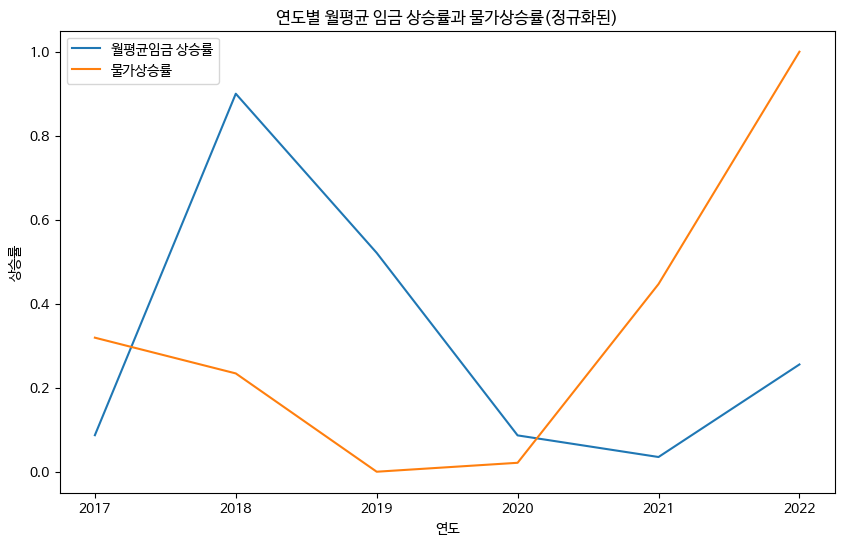

In [ ]:
# 월 평균 임금의 상승률 계산
mean_wage_normalized['전체(실질) 상승률'] = mean_wage_normalized['전체(실질)'].pct_change()

mean_wage_normalized.replace([np.inf, -np.inf], np.nan, inplace=True)

# 상승률 계산을 위해 첫번째 row는 NaN이 될 것이므로 제거
mean_wage_normalized = mean_wage_normalized.dropna()

# 비교할 물가상승률 데이터도 동일한 기간으로 맞춰주기
inflation_rate_normalized = inflation_rate_normalized[1:]

# 시각화
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.figure(figsize=(10,6))
sns.lineplot(x=mean_wage_normalized['연도'][1:], y=mean_wage_normalized['전체(실질) 상승률'][1:], label='월평균임금 상승률')
sns.lineplot(x=wage_data_normalized['연도'][3:], y=inflation_rate_normalized[2:].flatten(), label='물가상승률')
plt.title('연도별 월평균 임금 상승률과 물가상승률(정규화된)')
plt.xlabel('연도')
plt.ylabel('상승률')
plt.legend()
plt.show()


월평균 임금의 실질 상승률과 물가상승률이 연도에 따라 어떻게 변화하는지 시각적으로 확인할 수 있습니다.
일반적으로, 물가상승률이 상승할 때 월평균 임금의 실질 상승률도 상승하는 경향이 있지만, 이는 항상 그런 것은 아닙니다. 예를 들어, 2020년과 2021년 사이에는 월평균 임금의 실질 상승률이 하락하는 반면, 물가상승률이 상승하는 것을 볼 수 있습니다.
또한, 물가상승률이 하락하거나 변동이 적을 때에도 월평균 임금의 실질 상승률은 상승하는 경향이 있습니다. 이는 임금이 다른 요인들, 예를 들어 경제 성장률, 생산성 증가 등에 의해 영향을 받기 때문일 수 있습니다.

#### 추가적인 분석 방향
이 분석을 통해 임금과 물가상승률이 어떻게 연관되어 있는지, 그리고 물가 상승률이 임금에 어떤 영향을 미치는지에 대한 통찰을 얻을 수 있습니다. 하지만, 이러한 관계를 더 깊이 이해하기 위해서는 더 많은 요인을 고려하고, 더욱 복잡한 모델을 사용해야 할 수 있습니다.

In [ ]:
wage_data_normalized['연도'][3:]

6    2017
5    2018
4    2019
3    2020
2    2021
1    2022
Name: 연도, dtype: int64

In [ ]:
inflation_rate_normalized[3:].flatten()

array([0.23404255, 0.        , 0.0212766 , 0.44680851, 1.        ])

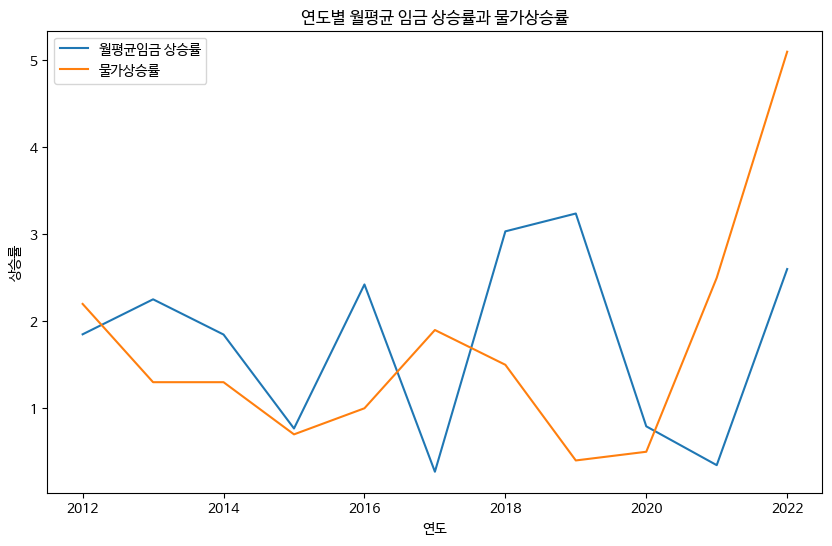

In [ ]:
# 월 평균 임금의 상승률 계산
mean_wage_new = mean_wage.copy()
mean_wage_new['전체(실질) 상승률'] = mean_wage['전체(실질)'].pct_change() * 100  # %로 비교


# mean_wage_new.replace([np.inf, -np.inf], np.nan, inplace=True)

# 상승률 계산을 위해 첫번째 row는 NaN이 될 것이므로 제거
mean_wage_new = mean_wage_new.dropna()

# 비교할 물가상승률 데이터도 동일한 기간으로 맞춰주기
inflation_rate = inflation_T['소비자물가상승률(%)'].astype(float)

# 시각화
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.figure(figsize=(10,6))
sns.lineplot(x=mean_wage_new['연도'][5:], y=mean_wage_new['전체(실질) 상승률'][5:], label='월평균임금 상승률')
sns.lineplot(x=inflation_T['연도'], y=inflation_rate, label='물가상승률')
plt.title('연도별 월평균 임금 상승률과 물가상승률')
plt.xlabel('연도')
plt.ylabel('상승률')
plt.legend()
plt.show()


In [ ]:
mean_wage_new['연도'][5:]

6     2012
7     2013
8     2014
9     2015
10    2016
11    2017
12    2018
13    2019
14    2020
15    2021
16    2022
Name: 연도, dtype: int64

In [ ]:
mean_wage_new['전체(실질) 상승률'][5:]

6     1.850481
7     2.252907
8     1.847903
9     0.767620
10    2.423823
11    0.270453
12    3.034390
13    3.239529
14    0.792393
15    0.345912
16    2.601065
Name: 전체(실질) 상승률, dtype: float64

In [ ]:
inflation_T['연도']

0     2012
1     2013
2     2014
3     2015
4     2016
5     2017
6     2018
7     2019
8     2020
9     2021
10    2022
Name: 연도, dtype: int64

In [ ]:
inflation_rate

0     2.2
1     1.3
2     1.3
3     0.7
4     1.0
5     1.9
6     1.5
7     0.4
8     0.5
9     2.5
10    5.1
Name: 소비자물가상승률(%), dtype: float64

월평균임금 상승률: 2012년에 비해 2022년까지 월평균임금 상승률은 전반적으로 증가하는 추세를 보였습니다. 특히, 2018년과 2019년에 상승률이 뚜렷하게 증가하였고, 2022년에는 2.60%의 상승률을 보였습니다.

소비자물가상승률: 2012년부터 2022년까지 물가상승률은 일반적으로 낮았으나, 2022년에 5.1%로 급증하였습니다.

월평균임금 상승률과 소비자물가상승률을 비교하면, 월평균임금 상승률이 일반적으로 물가상승률보다 높아야 소비자의 실질 구매력이 증가하고, 그에 따라 생활 수준이 향상됩니다. 그러나 이 두 지표가 물가상승률보다 낮아지면, 소비자의 구매력은 실제로 감소하게 됩니다.

이에 따라, 월평균임금의 실질 상승률이 전반적으로 물가상승률을 초과하고 있음을 알 수 있습니다. 이는 사람들의 실질 구매력 증가를 의미합니다. 그러나 2022년에는 물가상승률이 급격히 증가하여 월평균임금의 실질 상승률을 초과하였습니다. 이는 고려해야 할 중요한 경제적 이슈로, 앞으로의 추세를 예측하기 위해서는 추가적인 분석이 필요합니다.

# 직종별 임금 및 근로시간 시각화

In [ ]:
# 직종별 임금 및 근로시간
import pandas as pd
job_wage = pd.read_csv('/content/drive/MyDrive/비쥬얼라이제이션_프로젝트/data/직종별_임금_및_근로시간__표준직업분류_7차__20230713145825.csv',encoding='cp949')
job_wage=job_wage.rename(columns = job_wage.iloc[0])
job_wage = job_wage.drop(job_wage.index[0])
job_wage
#job_wage_rm = job_wage.dropna(axis=0)
#job_wage_rm

,고용형태,직종별,총근로일수 (일),총근로시간 (시간),소정실근로시간 (시간),초과근로시간 (시간),휴일근로시간 (시간),시간당임금총액 (원),시간당정액급여 (원),월임금총액 (천원),...,초과근로시간 (시간),휴일근로시간 (시간),시간당임금총액 (원),시간당정액급여 (원),월임금총액 (천원),월급여액 (천원),정액급여 (천원),초과급여 (천원),전년도 연간특별급여/12개월 (천원),전년도 연간특별급여 (천원)
1,전체근로자,전직종,20.7,163.6,157.1,6.5,1.6,19316,17349,3180,...,7.5,2.2,22651,20308,3526,3172,2992,180,355,4255
2,전체근로자,관리자(1),21.9,176.9,173.8,3.1,0.6,59024,50704,10346,...,3.5,0.8,73158,63384,11880,10305,10155,150,1575,18903
3,전체근로자,전문가 및 관련종사자(2),21.5,170.3,165.3,5.0,0.9,23446,20836,3932,...,5.5,1.1,27328,24287,4260,3778,3621,157,482,5781
4,전체근로자,사무 종사자(3),21.7,173.4,169.1,4.3,0.8,21777,19323,3787,...,4.6,1.1,25786,22856,4157,3695,3580,115,462,5548
5,전체근로자,서비스 종사자(4),20.0,132.6,129.7,2.9,0.7,11837,11540,1574,...,4.1,1.2,13378,12987,1729,1686,1604,82,43,515
6,전체근로자,판매 종사자(5),20.2,154.8,151.5,3.3,0.8,16131,14943,2632,...,3.6,1.2,18625,17328,2862,2660,2583,77,202,2423
7,전체근로자,농림·어업 숙련 종사자(6),19.6,153.8,148.4,5.5,2.5,15447,14799,2284,...,6.0,3.1,16875,16317,2411,2339,2224,115,72,862
8,전체근로자,기능원 및 관련 기능 종사자(7),18.6,151.3,144.6,6.7,2.3,19495,18183,2806,...,7.8,3.0,22345,20889,3017,2799,2623,177,218,2613
9,전체근로자,장치·기계 조작 및 조립 종사자(8),21.7,183.5,165.5,18.0,4.7,17904,14965,3228,...,21.3,7.0,20322,16895,3609,3144,2635,508,465,5579
10,전체근로자,단순노무 종사자(9),18.6,144.6,138.3,6.3,1.8,13131,12601,1828,...,8.2,2.7,14530,13936,2019,1955,1803,152,64,767


In [ ]:
job_wage.columns

Index(['고용형태', '직종별', '총근로일수 (일)', '총근로시간 (시간)', '소정실근로시간 (시간)', '초과근로시간 (시간)',
       '휴일근로시간 (시간)', '시간당임금총액 (원)', '시간당정액급여 (원)', '월임금총액 (천원)', '월급여액 (천원)',
       '정액급여 (천원)', '초과급여 (천원)', '전년도 연간특별급여/12개월 (천원)', '전년도 연간특별급여 (천원)',
       '총근로일수 (일)', '총근로시간 (시간)', '소정실근로시간 (시간)', '초과근로시간 (시간)', '휴일근로시간 (시간)',
       '시간당임금총액 (원)', '시간당정액급여 (원)', '월임금총액 (천원)', '월급여액 (천원)', '정액급여 (천원)',
       '초과급여 (천원)', '전년도 연간특별급여/12개월 (천원)', '전년도 연간특별급여 (천원)', '총근로일수 (일)',
       '총근로시간 (시간)', '소정실근로시간 (시간)', '초과근로시간 (시간)', '휴일근로시간 (시간)',
       '시간당임금총액 (원)', '시간당정액급여 (원)', '월임금총액 (천원)', '월급여액 (천원)', '정액급여 (천원)',
       '초과급여 (천원)', '전년도 연간특별급여/12개월 (천원)', '전년도 연간특별급여 (천원)'],
      dtype='object')

In [ ]:
job_wage_2020 = job_wage.iloc[:,[0,1]+list(range(2,15))]

job_wage_2020['년도'] = 2020

job_wage_2020

<ipython-input-348-e4acd390755f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_wage_2020['년도'] = 2020


,고용형태,직종별,총근로일수 (일),총근로시간 (시간),소정실근로시간 (시간),초과근로시간 (시간),휴일근로시간 (시간),시간당임금총액 (원),시간당정액급여 (원),월임금총액 (천원),월급여액 (천원),정액급여 (천원),초과급여 (천원),전년도 연간특별급여/12개월 (천원),전년도 연간특별급여 (천원),년도
1,전체근로자,전직종,20.7,163.6,157.1,6.5,1.6,19316,17349,3180,2866,2723,143,314,3770,2020
2,전체근로자,관리자(1),21.9,176.9,173.8,3.1,0.6,59024,50704,10346,8915,8789,126,1432,17178,2020
3,전체근로자,전문가 및 관련종사자(2),21.5,170.3,165.3,5.0,0.9,23446,20836,3932,3495,3357,137,437,5249,2020
4,전체근로자,사무 종사자(3),21.7,173.4,169.1,4.3,0.8,21777,19323,3787,3372,3275,98,415,4977,2020
5,전체근로자,서비스 종사자(4),20.0,132.6,129.7,2.9,0.7,11837,11540,1574,1539,1486,53,35,417,2020
6,전체근로자,판매 종사자(5),20.2,154.8,151.5,3.3,0.8,16131,14943,2632,2435,2368,67,197,2359,2020
7,전체근로자,농림·어업 숙련 종사자(6),19.6,153.8,148.4,5.5,2.5,15447,14799,2284,2177,2085,92,107,1283,2020
8,전체근로자,기능원 및 관련 기능 종사자(7),18.6,151.3,144.6,6.7,2.3,19495,18183,2806,2601,2461,140,205,2457,2020
9,전체근로자,장치·기계 조작 및 조립 종사자(8),21.7,183.5,165.5,18.0,4.7,17904,14965,3228,2814,2431,383,414,4965,2020
10,전체근로자,단순노무 종사자(9),18.6,144.6,138.3,6.3,1.8,13131,12601,1828,1769,1656,112,59,708,2020


In [ ]:
job_wage_2021 = job_wage.iloc[:,[0,1]+list(range(15,28))]

job_wage_2021['년도'] = 2021

job_wage_2021

<ipython-input-349-850fe6164a80>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_wage_2021['년도'] = 2021


,고용형태,직종별,총근로일수 (일),총근로시간 (시간),소정실근로시간 (시간),초과근로시간 (시간),휴일근로시간 (시간),시간당임금총액 (원),시간당정액급여 (원),월임금총액 (천원),월급여액 (천원),정액급여 (천원),초과급여 (천원),전년도 연간특별급여/12개월 (천원),전년도 연간특별급여 (천원),년도
1,전체근로자,전직종,20.8,164.2,157.2,6.9,1.7,19806,17931,3271,2974,2816,158,298,3572,2021
2,전체근로자,관리자(1),22.0,178.1,174.4,3.7,0.9,62043,54425,10947,9630,9480,150,1317,15804,2021
3,전체근로자,전문가 및 관련종사자(2),21.4,169.4,164.0,5.4,1.0,23898,21549,3967,3570,3427,144,396,4756,2021
4,전체근로자,사무 종사자(3),21.8,173.5,169.1,4.4,0.8,22441,20066,3911,3508,3403,104,403,4840,2021
5,전체근로자,서비스 종사자(4),20.0,133.1,129.6,3.4,0.8,12295,11944,1632,1598,1532,66,35,417,2021
6,전체근로자,판매 종사자(5),20.0,152.5,149.1,3.3,0.9,16398,15355,2659,2485,2418,67,174,2091,2021
7,전체근로자,농림·어업 숙련 종사자(6),18.6,145.5,140.9,4.6,2.2,15962,15365,2177,2089,2002,87,88,1062,2021
8,전체근로자,기능원 및 관련 기능 종사자(7),18.6,151.1,143.9,7.2,2.5,20226,18895,2903,2697,2540,156,206,2471,2021
9,전체근로자,장치·기계 조작 및 조립 종사자(8),22.0,187.5,168.2,19.2,5.3,18074,15174,3370,2973,2529,444,397,4765,2021
10,전체근로자,단순노무 종사자(9),19.0,147.6,140.6,7.0,1.9,13074,12567,1870,1818,1693,125,53,631,2021


In [ ]:
job_wage_2022 = job_wage.iloc[:,[0,1]+list(range(28,41))]
job_wage_2022['년도'] = 2022

job_wage_2022

<ipython-input-350-45d5a7dbe454>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_wage_2022['년도'] = 2022


,고용형태,직종별,총근로일수 (일),총근로시간 (시간),소정실근로시간 (시간),초과근로시간 (시간),휴일근로시간 (시간),시간당임금총액 (원),시간당정액급여 (원),월임금총액 (천원),월급여액 (천원),정액급여 (천원),초과급여 (천원),전년도 연간특별급여/12개월 (천원),전년도 연간특별급여 (천원),년도
1,전체근로자,전직종,19.6,154.9,147.4,7.5,2.2,22651,20308,3526,3172,2992,180,355,4255,2022
2,전체근로자,관리자(1),20.2,164.2,160.7,3.5,0.8,73158,63384,11880,10305,10155,150,1575,18903,2022
3,전체근로자,전문가 및 관련종사자(2),19.9,158.0,152.4,5.5,1.1,27328,24287,4260,3778,3621,157,482,5781,2022
4,전체근로자,사무 종사자(3),20.1,161.0,156.4,4.6,1.1,25786,22856,4157,3695,3580,115,462,5548,2022
5,전체근로자,서비스 종사자(4),19.2,127.3,123.1,4.1,1.2,13378,12987,1729,1686,1604,82,43,515,2022
6,전체근로자,판매 종사자(5),19.0,145.9,142.2,3.6,1.2,18625,17328,2862,2660,2583,77,202,2423,2022
7,전체근로자,농림·어업 숙련 종사자(6),19.8,151.8,145.8,6.0,3.1,16875,16317,2411,2339,2224,115,72,862,2022
8,전체근로자,기능원 및 관련 기능 종사자(7),17.4,141.7,133.9,7.8,3.0,22345,20889,3017,2799,2623,177,218,2613,2022
9,전체근로자,장치·기계 조작 및 조립 종사자(8),20.8,178.6,157.3,21.3,7.0,20322,16895,3609,3144,2635,508,465,5579,2022
10,전체근로자,단순노무 종사자(9),18.3,143.4,135.2,8.2,2.7,14530,13936,2019,1955,1803,152,64,767,2022


In [ ]:
job_wage_cc = pd.concat([job_wage_2020, job_wage_2021, job_wage_2022], ignore_index=True)
job_wage_cc

,고용형태,직종별,총근로일수 (일),총근로시간 (시간),소정실근로시간 (시간),초과근로시간 (시간),휴일근로시간 (시간),시간당임금총액 (원),시간당정액급여 (원),월임금총액 (천원),월급여액 (천원),정액급여 (천원),초과급여 (천원),전년도 연간특별급여/12개월 (천원),전년도 연간특별급여 (천원),년도
0,전체근로자,전직종,20.7,163.6,157.1,6.5,1.6,19316,17349,3180,2866,2723,143,314,3770,2020
1,전체근로자,관리자(1),21.9,176.9,173.8,3.1,0.6,59024,50704,10346,8915,8789,126,1432,17178,2020
2,전체근로자,전문가 및 관련종사자(2),21.5,170.3,165.3,5.0,0.9,23446,20836,3932,3495,3357,137,437,5249,2020
3,전체근로자,사무 종사자(3),21.7,173.4,169.1,4.3,0.8,21777,19323,3787,3372,3275,98,415,4977,2020
4,전체근로자,서비스 종사자(4),20.0,132.6,129.7,2.9,0.7,11837,11540,1574,1539,1486,53,35,417,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,비정규직근로자(특수형태포함),판매 종사자(5),-,-,-,-,-,-,-,2068,2064,2049,15,5,57,2022
146,비정규직근로자(특수형태포함),농림·어업 숙련 종사자(6),-,-,-,-,-,-,-,2040,2023,1939,84,17,203,2022
147,비정규직근로자(특수형태포함),기능원 및 관련 기능 종사자(7),-,-,-,-,-,-,-,2280,2271,2222,50,9,102,2022
148,비정규직근로자(특수형태포함),장치·기계 조작 및 조립 종사자(8),-,-,-,-,-,-,-,2992,2937,2612,326,55,657,2022


In [ ]:
import numpy as np

job_wage_cc.replace('-', np.nan, inplace=True)

In [ ]:
job_wage_cc.dropna(inplace=True)

In [ ]:
job_wage_cc

,고용형태,직종별,총근로일수 (일),총근로시간 (시간),소정실근로시간 (시간),초과근로시간 (시간),휴일근로시간 (시간),시간당임금총액 (원),시간당정액급여 (원),월임금총액 (천원),월급여액 (천원),정액급여 (천원),초과급여 (천원),전년도 연간특별급여/12개월 (천원),전년도 연간특별급여 (천원),년도
0,전체근로자,전직종,20.7,163.6,157.1,6.5,1.6,19316,17349,3180,2866,2723,143,314,3770,2020
1,전체근로자,관리자(1),21.9,176.9,173.8,3.1,0.6,59024,50704,10346,8915,8789,126,1432,17178,2020
2,전체근로자,전문가 및 관련종사자(2),21.5,170.3,165.3,5.0,0.9,23446,20836,3932,3495,3357,137,437,5249,2020
3,전체근로자,사무 종사자(3),21.7,173.4,169.1,4.3,0.8,21777,19323,3787,3372,3275,98,415,4977,2020
4,전체근로자,서비스 종사자(4),20.0,132.6,129.7,2.9,0.7,11837,11540,1574,1539,1486,53,35,417,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,비정규근로자,판매 종사자(5),14.1,84.9,83.3,1.6,0.6,11481,11333,1019,1010,980,31,9,113,2022
136,비정규근로자,농림·어업 숙련 종사자(6),17.8,131.8,126.8,4.9,2.1,17517,17247,2040,2023,1939,84,17,203,2022
137,비정규근로자,기능원 및 관련 기능 종사자(7),12.6,99.4,96.9,2.5,0.8,24529,24432,2274,2265,2214,51,9,104,2022
138,비정규근로자,장치·기계 조작 및 조립 종사자(8),19.4,164.4,143.8,20.6,5.7,15590,14656,2489,2425,2038,386,65,778,2022


In [ ]:

# 3번째부터 15번째 열까지의 이름 가져오기
columns_to_convert = job_wage_cc.columns[2:15]

# 해당 열의 데이터 타입을 float로 바꾸기
job_wage_cc[columns_to_convert] = job_wage_cc[columns_to_convert].astype(float)

job_wage_cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 139
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   고용형태                  90 non-null     object 
 1   직종별                   90 non-null     object 
 2   총근로일수 (일)             90 non-null     float64
 3   총근로시간 (시간)            90 non-null     float64
 4   소정실근로시간 (시간)          90 non-null     float64
 5   초과근로시간 (시간)           90 non-null     float64
 6   휴일근로시간 (시간)           90 non-null     float64
 7   시간당임금총액 (원)           90 non-null     float64
 8   시간당정액급여 (원)           90 non-null     float64
 9   월임금총액 (천원)            90 non-null     float64
 10  월급여액 (천원)             90 non-null     float64
 11  정액급여 (천원)             90 non-null     float64
 12  초과급여 (천원)             90 non-null     float64
 13  전년도 연간특별급여/12개월 (천원)  90 non-null     float64
 14  전년도 연간특별급여 (천원)       90 non-null     float64
 15  년도                    90

In [ ]:
job_wage_cc.groupby(['년도','고용형태']).sum()

<ipython-input-356-a9a0a0b07da9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  job_wage_cc.groupby(['년도','고용형태']).sum()


총근로일수 (일)  총근로시간 (시간)  소정실근로시간 (시간)  초과근로시간 (시간)  휴일근로시간 (시간)  \
년도   고용형태                                                                    
2020 비정규근로자      175.1      1236.9        1199.5         37.3         10.3   
     전체근로자       204.5      1604.8        1543.3         61.6         16.7   
     정규근로자       221.4      1801.0        1726.8         74.1         20.5   
2021 비정규근로자      174.0      1232.3        1192.7         39.7         10.2   
     전체근로자       204.2      1602.5        1537.0         65.1         18.0   
     정규근로자       222.0      1802.7        1723.9         78.8         22.4   
2022 비정규근로자      169.2      1198.9        1152.7         46.1         13.9   
     전체근로자       194.3      1526.8        1454.4         72.1         23.4   
     정규근로자       208.4      1700.7        1613.8         86.9         29.0   

             시간당임금총액 (원)  시간당정액급여 (원)  월임금총액 (천원)  월급여액 (천원)  정액급여 (천원)  \
년도   고용형태                                                                 
2020 비정규근로자     213411.0     196102.0     28252.0    25496.0    24842.0   
     전체근로자      217508.0     195243.0     35597.0    31983.0    30631.0   
     정규근로자      221225.0     195442.0     39388.0    35206.0    33561.0   
2021 비정규근로자     218502.0     202368.0     29010.0    26403.0    25671.0   
     전체근로자      224217.0     203271.0     36707.0    33342.0    31840.0   
     정규근로자      228094.0     203669.0     40703.0    36787.0    34956.0   
2022 비정규근로자     246990.0     223041.0     31529.0    27928.0    27042.0   
     전체근로자      254998.0     229187.0     39470.0    35533.0    33820.0   
     정규근로자      259306.0     229964.0     43367.0    38872.0    36801.0   

             초과급여 (천원)  전년도 연간특별급여/12개월 (천원)  전년도 연간특별급여 (천원)  
년도   고용형태                                                      
2020 비정규근로자      653.0                2757.0          33074.0  
     전체근로자      1351.0                3615.0          43363.0  
     정규근로자      1643.0                4182.0          50173.0  
2021 비정규근로자      733.0                2608.0          31287.0  
     전체근로자      1501.0                3367.0          40409.0  
     정규근로자      1832.0                3916.0          46998.0  
2022 비정규근로자      888.0                3601.0          43213.0  
     전체근로자      1713.0                3938.0          47246.0  
     정규근로자      2071.0                4493.0          53939.0

In [ ]:
job_wage_cc.columns

Index(['고용형태', '직종별', '총근로일수 (일)', '총근로시간 (시간)', '소정실근로시간 (시간)', '초과근로시간 (시간)',
       '휴일근로시간 (시간)', '시간당임금총액 (원)', '시간당정액급여 (원)', '월임금총액 (천원)', '월급여액 (천원)',
       '정액급여 (천원)', '초과급여 (천원)', '전년도 연간특별급여/12개월 (천원)', '전년도 연간특별급여 (천원)',
       '년도'],
      dtype='object')

In [ ]:
job_wage_cc['고용형태'].unique()

array(['전체근로자', '정규근로자', '비정규근로자'], dtype=object)

In [ ]:
job_wage_cc['직종별'].unique()

array(['전직종', '관리자(1)', '전문가 및 관련종사자(2)', '사무 종사자(3)', '서비스 종사자(4)',
       '판매 종사자(5)', '농림·어업 숙련 종사자(6)', '기능원 및 관련 기능 종사자(7)',
       '장치·기계 조작 및 조립 종사자(8)', '단순노무 종사자(9)'], dtype=object)

## 직종별 평균 근로시간

<ipython-input-360-4ec289777a66>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='총근로시간 (시간)', y='직종별', data=df_mean_working, ci=None)


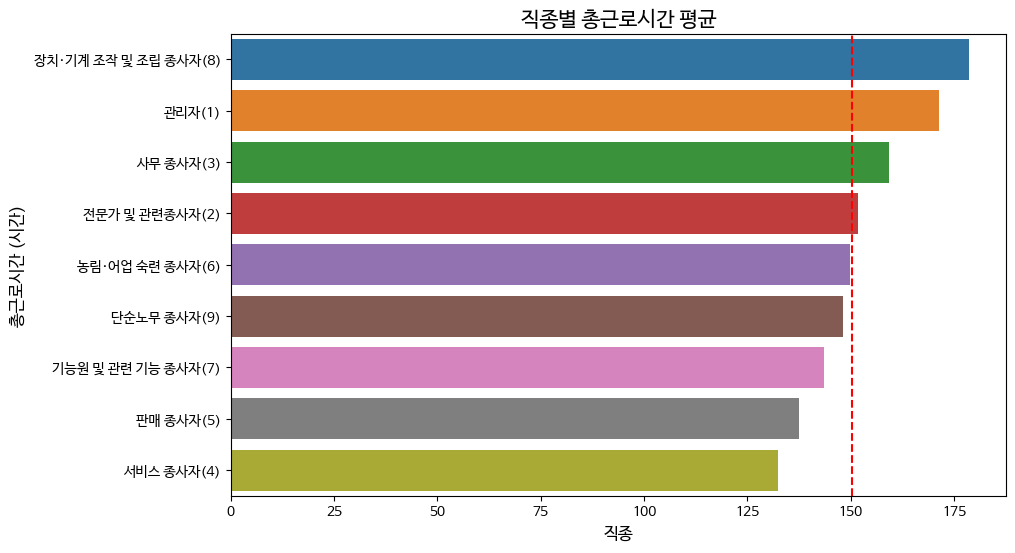

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

jw = job_wage_cc[job_wage_cc['직종별'] != '전직종']

mean_working_all = job_wage_cc[job_wage_cc['직종별'] == '전직종']['총근로시간 (시간)'].mean()
mean_working = jw.groupby('직종별', as_index=False)['총근로시간 (시간)'].mean()


df_mean_working = mean_working.sort_values('총근로시간 (시간)', ascending=False)

plt.rcParams['font.family'] = 'NanumBarunGothic'

plt.figure(figsize=(10, 6))  # 그래프 크기 조절

# average_work_hours.plot(kind='bar')
sns.barplot(x='총근로시간 (시간)', y='직종별', data=df_mean_working, ci=None)

plt.axvline(x=mean_working_all, color='r', linestyle='--', label=f'전직종 총근로시간 평균: {mean_working_all:.2f}')

plt.title('직종별 총근로시간 평균', fontsize=15)
plt.xlabel('직종',fontsize=12)
plt.ylabel('총근로시간 (시간)',fontsize=12)
plt.show()

# 전직종 제거, 전직종의 총 근로시간의 평균을 선으로 표시

## 직종별 평균 임금

<ipython-input-361-94b3430043f3>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='월임금총액 (천원)', y='직종별', data=df_mean_salary, ci=None)


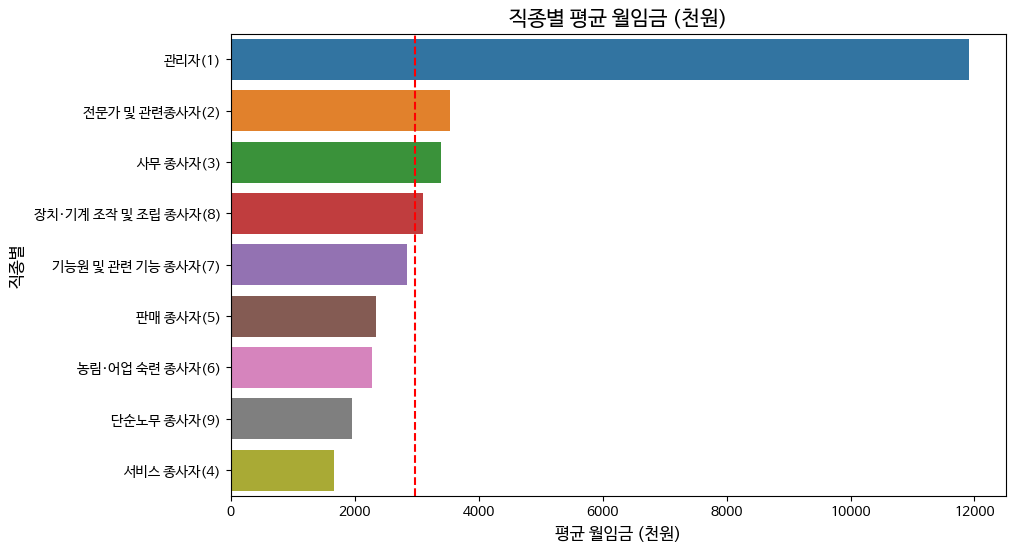

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# '직종별'을 기준으로 '월임금총액 (천원)'의 평균을 계산합니다.
jw_1 = job_wage_cc[job_wage_cc['직종별'] != '전직종']

mean_salary_all = job_wage_cc[job_wage_cc['직종별'] == '전직종']['월임금총액 (천원)'].mean()
mean_salary = jw_1.groupby('직종별', as_index=False)['월임금총액 (천원)'].mean()

# 평균 임금을 내림차순으로 정렬합니다.
df_mean_salary = mean_salary.sort_values('월임금총액 (천원)', ascending=False)
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.figure(figsize=(10, 6))

# 막대 그래프로 시각화합니다.
sns.barplot(x='월임금총액 (천원)', y='직종별', data=df_mean_salary, ci=None)
plt.axvline(x=mean_salary_all, color='r', linestyle='--', label=f'전직종 총근로시간 평균: {mean_salary_all:.2f}')

plt.title('직종별 평균 월임금 (천원)', fontsize=15)
plt.xlabel('평균 월임금 (천원)', fontsize=12)
plt.ylabel('직종별', fontsize=12)
plt.show()

## 근로시간과 임금의 관계

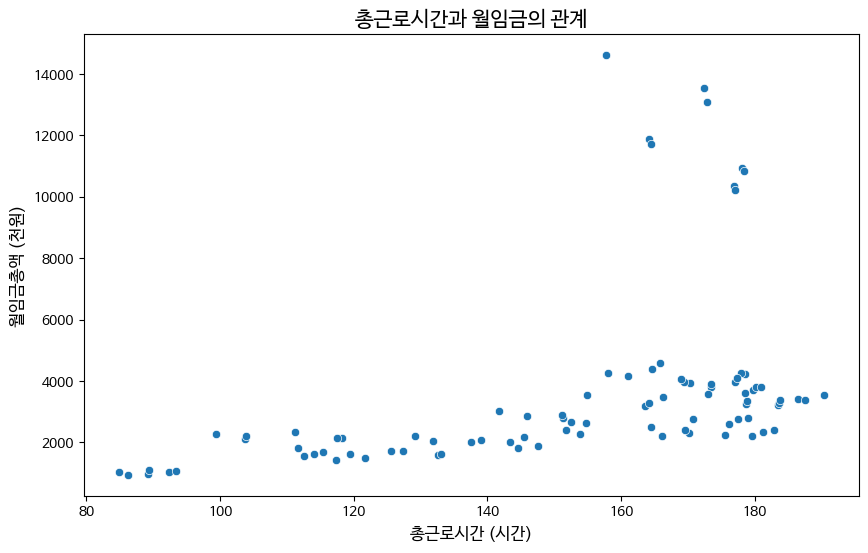

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# 산점도를 그립니다.
sns.scatterplot(data=job_wage_cc, x='총근로시간 (시간)', y='월임금총액 (천원)')
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.title('총근로시간과 월임금의 관계', fontsize=15)
plt.xlabel('총근로시간 (시간)', fontsize=12)
plt.ylabel('월임금총액 (천원)', fontsize=12)
plt.show()


In [ ]:
correlation = job_wage_cc['총근로시간 (시간)'].corr(job_wage_cc['월임금총액 (천원)'])
print(f"Correlation between '총근로시간 (시간)' and '월임금총액 (천원)': {correlation}")

# 0.43으로 약한 상관관계를 보임

Correlation between '총근로시간 (시간)' and '월임금총액 (천원)': 0.42911864698662355


### 고용형태별 근로시간과 임금의 관계

Text(0.5, 1.0, '고용형태별 총근로시간과 월임금의 관계')

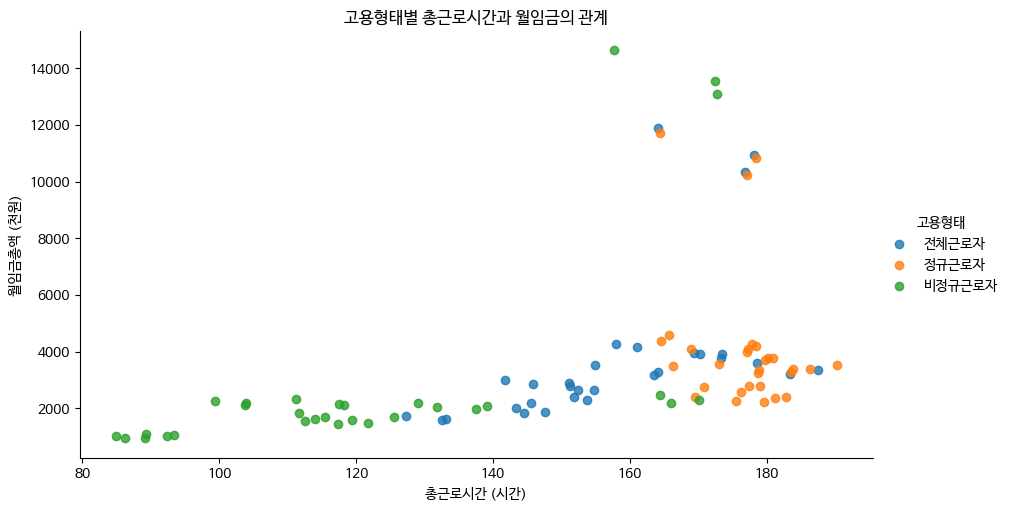

In [ ]:
sns.lmplot(x='총근로시간 (시간)', y='월임금총액 (천원)', hue='고용형태', data=job_wage_cc, fit_reg=False, aspect=1.8)

plt.title('고용형태별 총근로시간과 월임금의 관계')

### 직종별 근로시간과 임금의 관계

Text(0.5, 1.0, '직종별 총근로시간과 월임금의 관계')

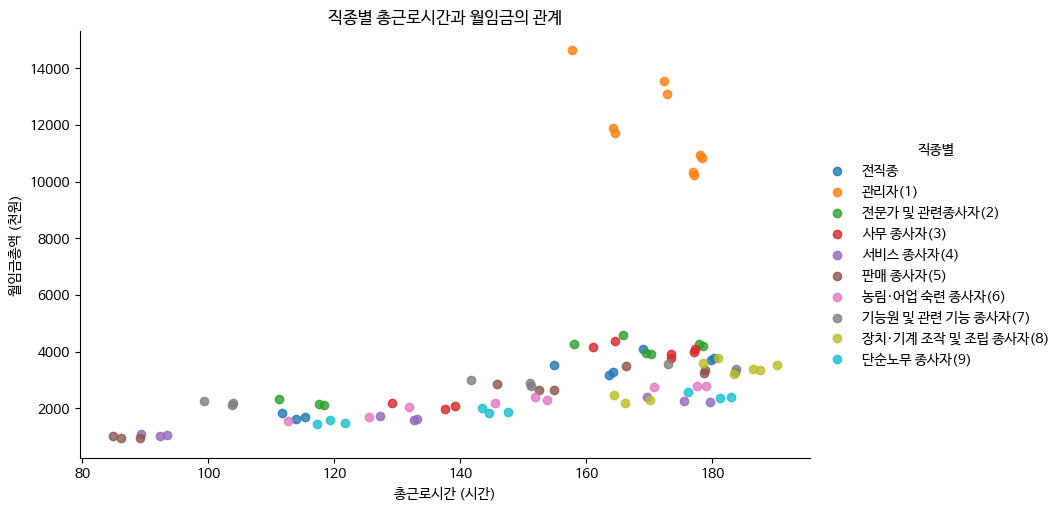

In [ ]:
sns.lmplot(x='총근로시간 (시간)', y='월임금총액 (천원)', hue='직종별', data=job_wage_cc, fit_reg=False, aspect=1.7)

plt.title('직종별 총근로시간과 월임금의 관계')